Your client is a meal delivery company which operates in multiple cities. They have various fulfillment centers in these cities for dispatching meal orders to their customers. The client wants you to help these centers with demand forecasting for upcoming weeks so that these centers will plan the stock of raw materials accordingly.

The replenishment of majority of raw materials is done on weekly basis and since the raw material is perishable, the procurement planning is of utmost importance. Secondly, staffing of the centers is also one area wherein accurate demand forecasts are really helpful. Given the following information, the task is to predict the demand for the next 10 weeks (Weeks: 146-155) for the center-meal combinations in the test set:

Historical data of demand for a product-center combination (Weeks: 1 to 145)
Product(Meal) features such as category, sub-category, current price and discount
Information for fulfillment center like center area, city information etc.


Predicting the stack demand for centers for the next 10 weeks.

In [17]:
#Dataset available here # https://github.com/aditi310896/Demand-Forecasting
import pandas as pd
import numpy as np
#from google.colab import files


In [18]:
#traindata =  files.upload()
#traindata

Data Exploration 
1.   Variable Identification
2.   Univariate Analysis
3.   Bi-variate Analysis
4.   Missing values treatment
5.   Outlier treatment
6.  Variable transformation
7.  Variable creation


In [27]:
#Importing the first file
train = pd.read_csv('trainn.csv')
meal = pd.read_csv('meal_info.csv')
center = pd.read_csv('fulfilment_center_info.csv')

In [28]:
# Preview 
train.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40


In [29]:
meal.head()
center.head()

,center_id,city_code,region_code,center_type,op_area
0,11,679,56,TYPE_A,3.7
1,13,590,56,TYPE_B,6.7
2,124,590,56,TYPE_C,4.0
3,66,648,34,TYPE_A,4.1
4,94,632,34,TYPE_C,3.6


In [32]:
# Merge the datasets for easy analysis
merge0 = pd.merge(train, center, on='center_id', how='inner')
merge0.head()

#merge1 = pd.merge(train, center, on='center_id', how='inner')
#merge1

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area
0,1379560,1,55,1885,136.83,152.29,0,0,177,647,56,TYPE_C,2.0
1,1466964,1,55,1993,136.83,135.83,0,0,270,647,56,TYPE_C,2.0
2,1346989,1,55,2539,134.86,135.86,0,0,189,647,56,TYPE_C,2.0
3,1338232,1,55,2139,339.50,437.53,0,0,54,647,56,TYPE_C,2.0
4,1448490,1,55,2631,243.50,242.50,0,0,40,647,56,TYPE_C,2.0


In [33]:
# Mearging the thrird file
merge1 = pd.merge(merge0, meal, on='meal_id')
merge1.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine
0,1379560,1,55,1885,136.83,152.29,0,0,177,647,56,TYPE_C,2.0,Beverages,Thai
1,1018704,2,55,1885,135.83,152.29,0,0,323,647,56,TYPE_C,2.0,Beverages,Thai
2,1196273,3,55,1885,132.92,133.92,0,0,96,647,56,TYPE_C,2.0,Beverages,Thai
3,1116527,4,55,1885,135.86,134.86,0,0,163,647,56,TYPE_C,2.0,Beverages,Thai
4,1343872,5,55,1885,146.50,147.50,0,0,215,647,56,TYPE_C,2.0,Beverages,Thai


From the above cell, the dataset is completly merged as a single file and we can proceed for further analysis.

In [34]:
# Variable Identification and data understanding
merge1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 456548 entries, 0 to 456547
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     456548 non-null  int64  
 1   week                   456548 non-null  int64  
 2   center_id              456548 non-null  int64  
 3   meal_id                456548 non-null  int64  
 4   checkout_price         456548 non-null  float64
 5   base_price             456548 non-null  float64
 6   emailer_for_promotion  456548 non-null  int64  
 7   homepage_featured      456548 non-null  int64  
 8   num_orders             456548 non-null  int64  
 9   city_code              456548 non-null  int64  
 10  region_code            456548 non-null  int64  
 11  center_type            456548 non-null  object 
 12  op_area                456548 non-null  float64
 13  category               456548 non-null  object 
 14  cuisine                456548 non-nu

The above output shows presence on object datatypes and intergers. 

The dataset also is clean without null values

In [35]:
# Dealing with the NaN in numerical columns with frequent values
#train_df.fillna(train_df.select_dtypes(include='number').mean().iloc[0], inplace=True)
#df1.fillna(df1.select_dtypes(include='object').mode().iloc[0], inplace=True)

# Option two drop the row with null value
#train_df = train_df.dropna(axis=0)
#train_df.isnull().sum()

In [36]:
merge1.describe()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,op_area
count,4.565480e+05,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.00000,456548.000000,456548.000000,456548.000000,456548.000000
mean,1.250096e+06,74.768771,82.105796,2024.337458,332.238933,354.156627,0.081152,0.10920,261.872760,601.553399,56.614566,4.083590
std,1.443548e+05,41.524956,45.975046,547.420920,152.939723,160.715914,0.273069,0.31189,395.922798,66.195914,17.641306,1.091686
min,1.000000e+06,1.000000,10.000000,1062.000000,2.970000,55.350000,0.000000,0.00000,13.000000,456.000000,23.000000,0.900000
25%,1.124999e+06,39.000000,43.000000,1558.000000,228.950000,243.500000,0.000000,0.00000,54.000000,553.000000,34.000000,3.600000
50%,1.250184e+06,76.000000,76.000000,1993.000000,296.820000,310.460000,0.000000,0.00000,136.000000,596.000000,56.000000,4.000000
75%,1.375140e+06,111.000000,110.000000,2539.000000,445.230000,458.870000,0.000000,0.00000,324.000000,651.000000,77.000000,4.500000
max,1.499999e+06,145.000000,186.000000,2956.000000,866.270000,866.270000,1.000000,1.00000,24299.000000,713.000000,93.000000,7.000000


In [40]:
# Understanding the correlation oft he varibles 
merge1.corr()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,op_area
id,1.000000,0.002225,0.002641,0.000488,0.001941,0.002909,0.002001,0.003111,0.000702,-0.000387,-0.000648,-0.000090
week,0.002225,1.000000,-0.003450,0.019814,0.026581,0.028614,-0.000841,-0.008263,-0.017210,0.000405,0.004600,0.001550
center_id,0.002641,-0.003450,1.000000,0.009893,0.001348,0.000604,0.013658,-0.005043,-0.053035,0.061078,-0.003426,-0.111869
meal_id,0.000488,0.019814,0.009893,1.000000,0.010748,0.002605,0.013402,0.016354,0.010597,-0.003198,-0.001662,-0.001546
checkout_price,0.001941,0.026581,0.001348,0.010748,1.000000,0.953389,0.004818,-0.057184,-0.282108,-0.004805,-0.003648,0.021569
base_price,0.002909,0.028614,0.000604,0.002605,0.953389,1.000000,0.171173,0.057156,-0.222306,-0.002054,-0.001934,0.018031
emailer_for_promotion,0.002001,-0.000841,0.013658,0.013402,0.004818,0.171173,1.000000,0.390534,0.277147,-0.005234,-0.007462,-0.019462
homepage_featured,0.003111,-0.008263,-0.005043,0.016354,-0.057184,0.057156,0.390534,1.000000,0.294490,0.008640,0.003605,0.041498
num_orders,0.000702,-0.017210,-0.053035,0.010597,-0.282108,-0.222306,0.277147,0.294490,1.000000,0.041596,0.029744,0.176976
city_code,-0.000387,0.000405,0.061078,-0.003198,-0.004805,-0.002054,-0.005234,0.008640,0.041596,1.000000,0.042686,0.131476


From the above output we can see a strong corelation among operation area, region, citycode with the number of orders. 

Univariate Analysis

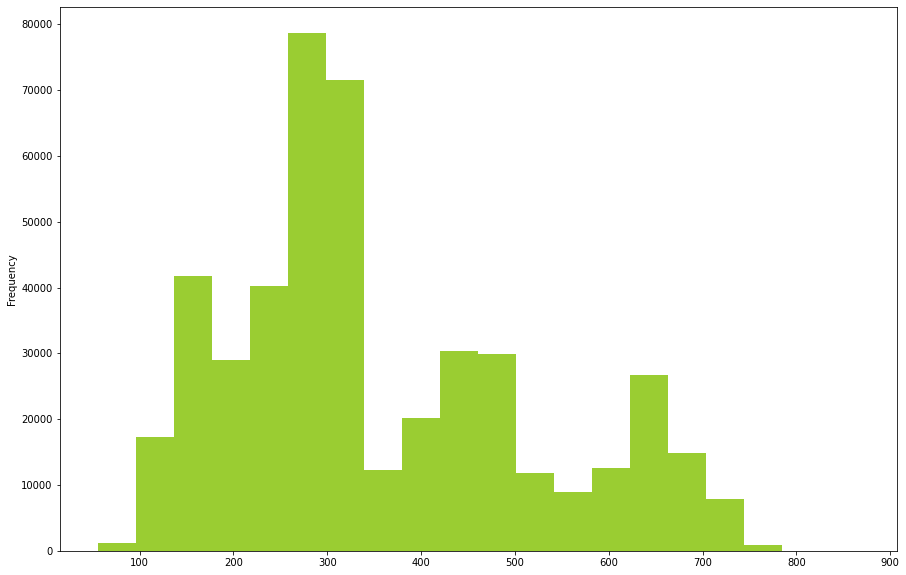

In [45]:
# Lets explore the distribution of base_price
merge1 ['base_price'].plot(kind='hist', bins=20, figsize=(15,10), facecolor = 'yellowgreen')


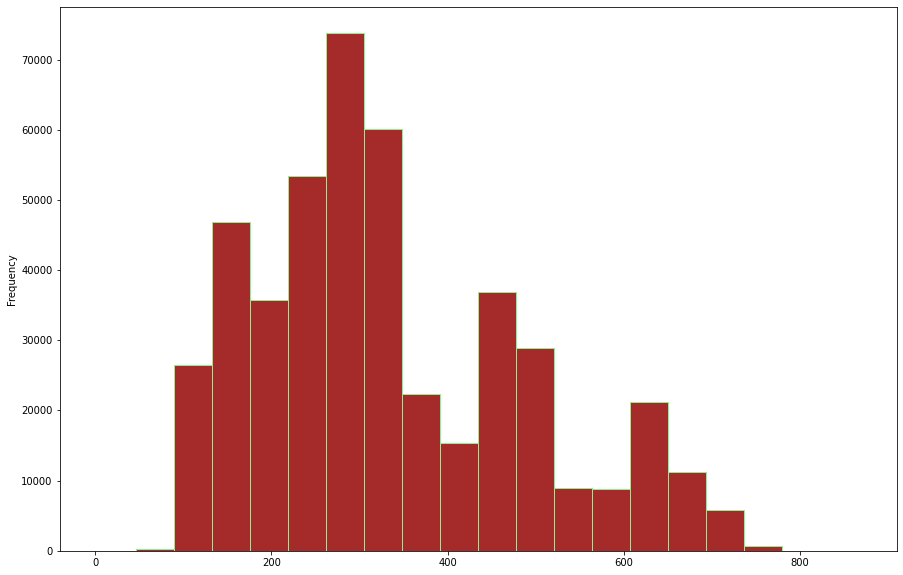

In [49]:
# Lets explore the distribution of checkout_price
import plotly.express as px
merge1 ['checkout_price'].plot(kind='hist', bins=20, figsize=(15,10), facecolor = 'brown', edgecolor='lightgreen')

Using matplotlib backend: agg


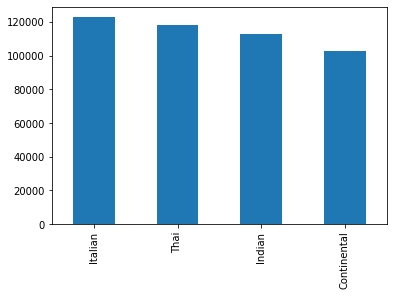

In [53]:
# How is cuisine distributed
import matplotlib.pyplot as plt
%matplotlib
merge1.cuisine.value_counts().plot(kind='bar')
plt.show()

In [59]:
#How were the orders varying accros the weeks
week_orders = merge1.groupby(['week'])[['num_orders']].sum() #, ascending=False()
week_orders


,num_orders
week,
1,792261
2,787084
3,695262
4,743529
5,1198675
...,...
141,776240
142,739661
143,759926


In [ ]:
# What is the averange distribution of weekly order?

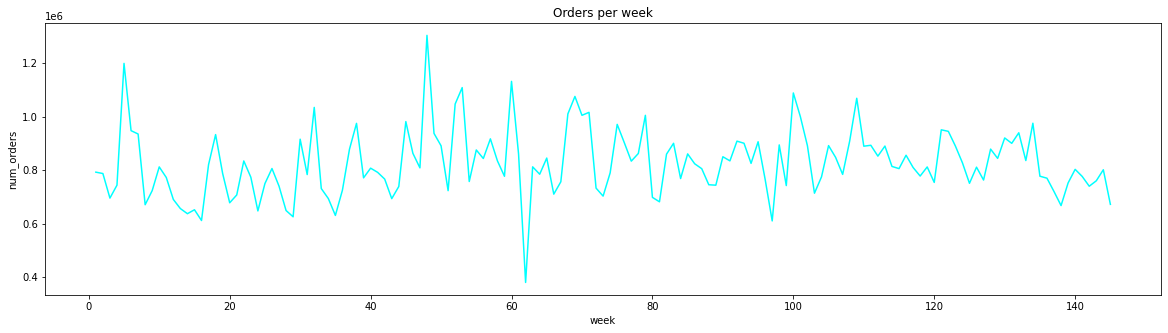

In [65]:
# Let's plot the trend of orders accros the weeks
plt.figure(figsize=(20,5))
sns.lineplot(x=week_orders.index, y =week_orders['num_orders'], color='cyan')
plt.title('Orders per week')
plt.show()

How are the centers buying our orders?

In [66]:
center = merge1.groupby(['center_id'])[['num_orders']].sum()
center

,num_orders
center_id,
10,3381018
11,2797300
13,4296545
14,1195108
17,1218319
...,...
161,813948
162,680255
174,2792587


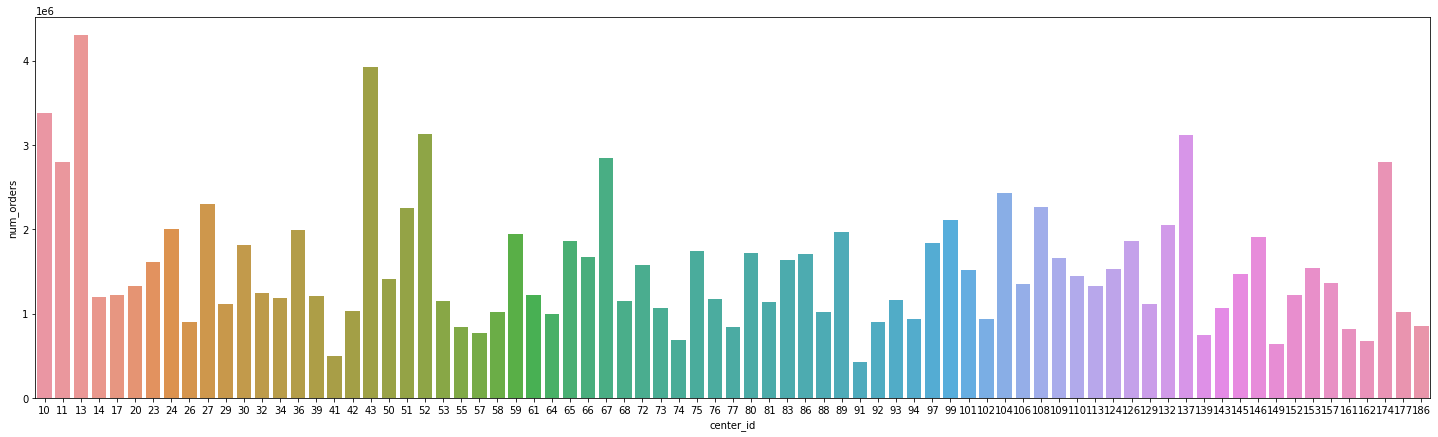

In [68]:
# Let's plot the centers verses the orders purchase
plt.figure(figsize=(25,7))
sns.barplot(x=center.index, y=center['num_orders'])
plt.show()

From the above plot we can see that center number 10,13,43, 52, 11, 137 are best customers, appropriate business strategies can be employed to examine how to boost sales in other centers.

In [73]:
# Which meal has many orders?
meal = merge1.groupby(['meal_id'])[['num_orders']].sum()
meal

,num_orders
meal_id,
1062,4712795
1109,6367773
1198,1018280
1207,1800856
1216,533564
1230,1843969
1247,231897
1248,874750
1311,1489681


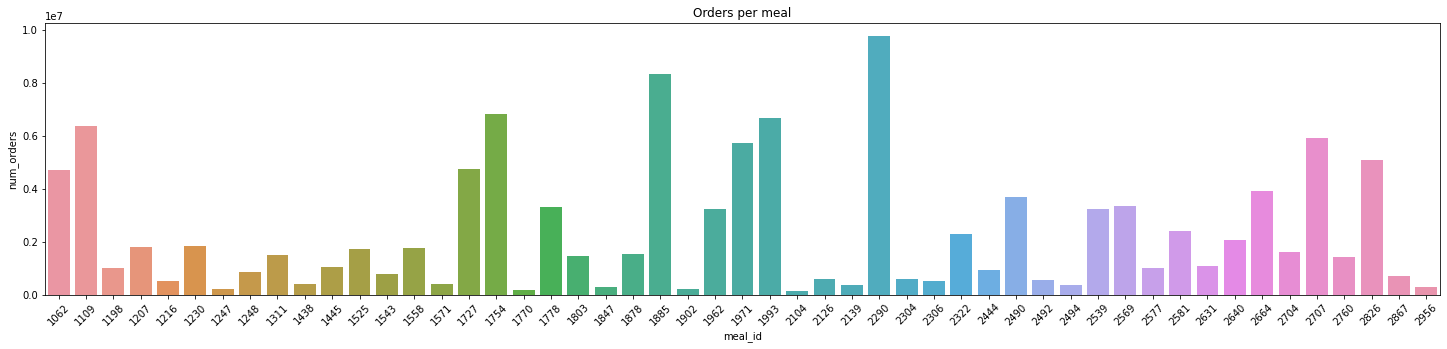

In [77]:
plt.figure(figsize=(25,5))
sns.barplot(x=meal.index, y=meal['num_orders'])
plt.xticks(rotation='45')
plt.title('Orders per meal')
plt.show()

In [80]:
# Which meal are our customers checking out more on average?
meal_checkout_price = merge1.groupby(['meal_id'])[['checkout_price']].mean()
meal_checkout_price

,checkout_price
meal_id,
1062,171.315789
1109,268.532165
1198,177.952687
1207,348.482656
1216,395.333775
1230,348.084174
1247,442.668847
1248,142.510589
1311,170.503253


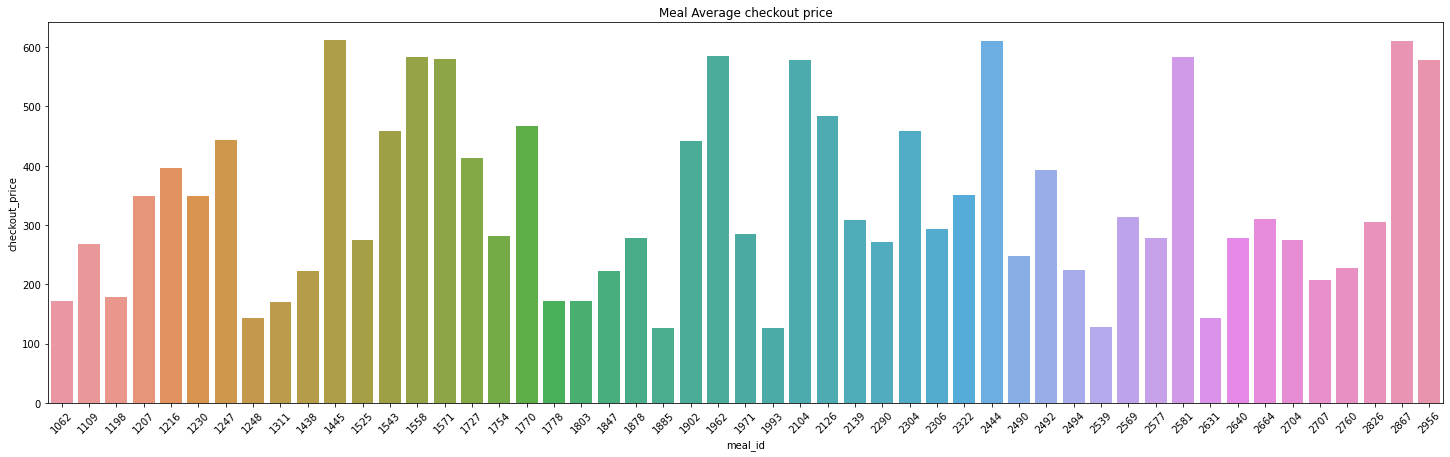

In [86]:
plt.figure(figsize=(25,7))
sns.barplot(x=meal_checkout_price.index, y=meal_checkout_price['checkout_price'])
plt.xticks(rotation='45')
plt.title('Meal Average checkout price')
plt.show()

Ignored the plot for above

In [83]:
# Which city is buying more orders?
city = merge1.groupby(['city_code'])[['num_orders']].sum()#.ascending()
city

,num_orders
city_code,
456,1937221
461,1158164
473,1214982
478,637527
485,1451046
515,894009
517,3205569
522,3375905
526,9207953


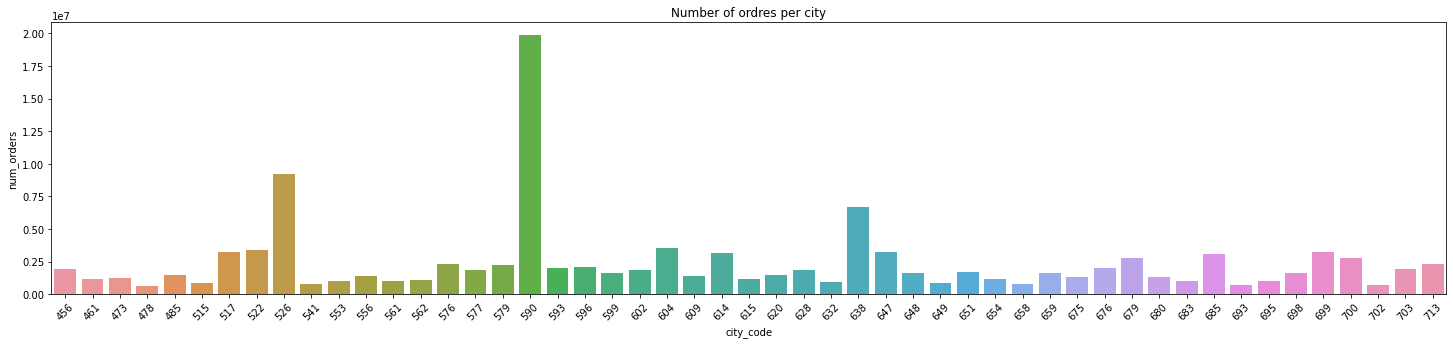

In [88]:
# Let's plot the orders per city
plt.figure(figsize=(25,5))
sns.barplot(x=city.index, y=city['num_orders'])
plt.xticks(rotation='45')
plt.title('Number of ordres per city')
plt.show()

Bivariate analysis 

How many orders do we get in every category?

In [69]:
# Which category had the highest orders

# Let's examine how many orders per individual category using pivot table
Orders = pd.pivot_table(data=merge1, index='category', values='num_orders', aggfunc=np.sum)
Orders

,num_orders
category,
Beverages,40480525
Biryani,631848
Desert,1940754
Extras,3984979
Fish,871959
Other Snacks,4766293
Pasta,1637744
Pizza,7383720
Rice Bowl,20874063


From the pivote-table we can see that Bevarages, Rice Bowl, salad sandwich Extras have most orders.

This means customers are buying most of these. 

In [87]:
# Which category has most orders?
import plotly.express as px
data = merge1.groupby("category")[["num_orders"]].sum().sort_values(by=['num_orders'],ascending=[False]).reset_index()
px.bar(data, x= 'category', y="num_orders",color='category',color_discrete_sequence=px.colors.qualitative.T10)

In [71]:
# Plot of number of orders against individual causine 
import plotly.express as px
data = merge1.groupby("center_type")[["num_orders"]].sum().sort_values(by=['num_orders'],ascending=[False]).reset_index()
px.bar(data, x= 'center_type', y="num_orders",color='center_type',color_discrete_sequence=px.colors.qualitative.T10)

In [90]:
# Plot the centers against number of order

import plotly.express as px
data = merge1.groupby("cuisine")[["num_orders"]].sum().sort_values(by=['num_orders'],ascending=[False]).reset_index()
px.bar(data, x= 'cuisine', y="num_orders",color='cuisine',color_discrete_sequence=px.colors.qualitative.T10)


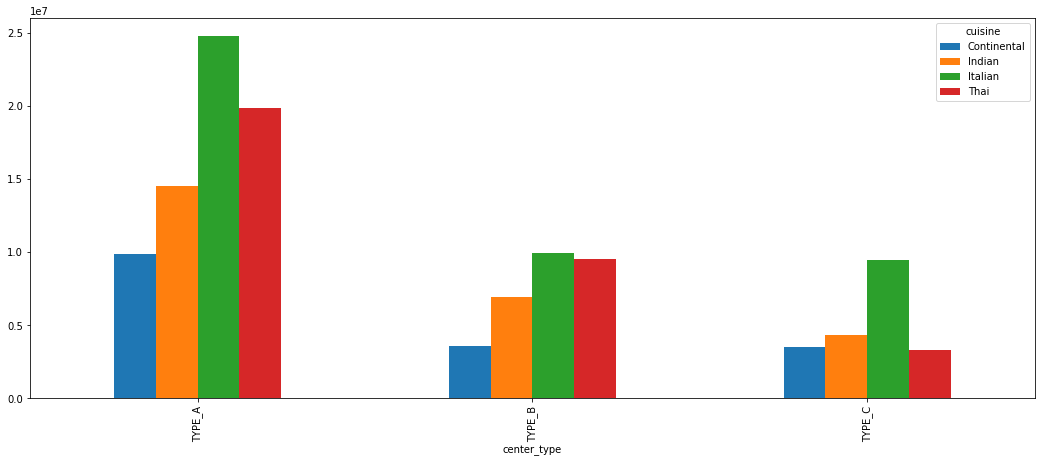

In [95]:
# What's the preference of our cuisine among our customers?
center_pref = merge1.groupby(['center_type','cuisine'])['num_orders'].sum()
center_pref = center_pref.unstack().fillna(0)
center_pref.plot(kind='bar', figsize=(18,7))

From the above we can see center type a buys most of Italian cuisine and least of continel cuisine.

In [ ]:
# Change the categorical cols to numericals
#cat_df = df.select_dtypes(include=['object']).apply(lambda x: x.astype('category').cat.codes)
#cat_df.head()

In [96]:
# Let's organize our data in weeks as it gives good view
merge1.sort_values(by='week',inplace=True)
merge1.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine
0,1379560,1,55,1885,136.83,152.29,0,0,177,647,56,TYPE_C,2.0,Beverages,Thai
299714,1102584,1,11,1525,242.50,282.33,0,1,460,679,56,TYPE_A,3.7,Other Snacks,Thai
299851,1026447,1,83,1525,244.50,281.33,0,0,94,659,77,TYPE_A,5.3,Other Snacks,Thai
299996,1177435,1,32,1525,249.29,251.29,0,0,82,526,34,TYPE_A,3.8,Other Snacks,Thai
31140,1108310,1,43,2539,133.86,135.86,0,0,675,590,56,TYPE_A,5.1,Beverages,Thai


As from the output our data goes from week 1 to week 145, next we can convert the weeks in date time, 

In [97]:
merge1 = merge1.groupby('week').sum()
merge1.head()

,id,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,op_area
week,,,,,,,,,,,
1,3645659662,238295,5777913,965809.26,1018365.32,357,414,792261,1758466,165591,11921.4
2,3614794872,235795,5734977,938092.43,1005779.20,621,514,787084,1743166,164178,11830.2
3,3615848647,237202,5723235,948560.28,1008352.05,104,316,695262,1745022,164383,11824.1
4,3613885389,236098,5722512,953833.69,1006446.90,0,292,743529,1738944,163637,11809.5
5,3571456643,237587,5661934,901141.58,1001075.16,337,466,1198675,1721065,160957,11658.5


In [101]:
# Let's assign a date function.

import datetime
from dateutil.relativedelta import relativedelta
# We assume the year of the dataset was from 2018
year = 2000
def change_week_to_datetime(data):
    return datetime.date(year,1,1)+relativedelta(weeks=+data)

In [105]:
data = merge1['num_orders']
data.index = list(map(change_week_to_datetime, data.index))
data.head()
#https://www.kaggle.com/talha1503/fooddemandpredictionsupervisedml
#https://stackoverflow.com/questions/67374437/overflowerror-date-value-out-of-range-when-converting-matlab-datenum-to-python

TypeError: ignored

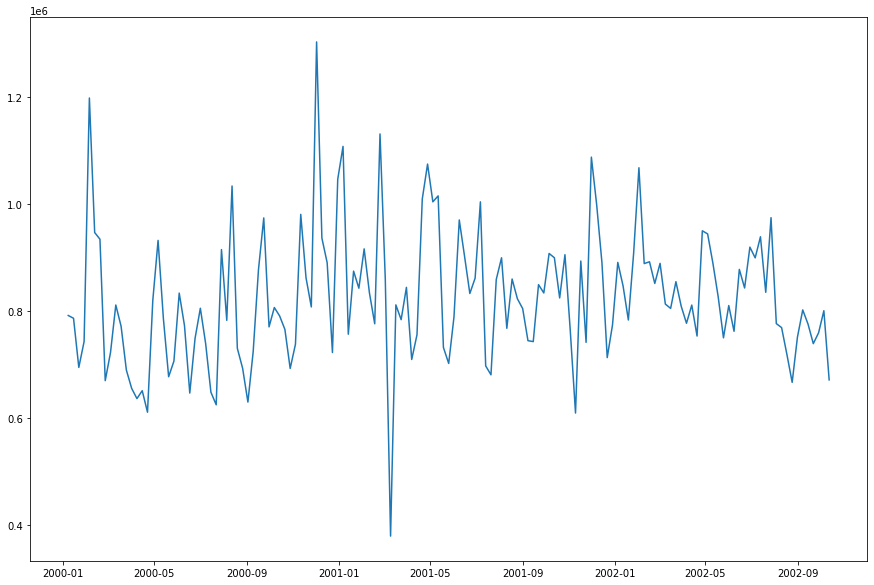

In [106]:
# What is the averange distribution of weekly order?

fig = plt.figure(1,(15,10))
plt.plot(data.index,data.values)
plt.show()

In [107]:
#train_df.head()

In [108]:
#train_df.columns

Checking variable corelation with the target

In [109]:
#Variable Correlations 
var_correlation = merge1.corr()
var_correlation['num_orders']

id                       0.289652
center_id                0.296634
meal_id                  0.285232
checkout_price           0.135799
base_price               0.273747
emailer_for_promotion    0.484683
homepage_featured        0.477732
num_orders               1.000000
city_code                0.293364
region_code              0.287965
op_area                  0.278369
Name: num_orders, dtype: float64

In [110]:
# With this code we'll get only the variables with highest correlation with target variable
cor_target = abs(var_correlation['num_orders'])

# Display features with correlation < 0.2
remove_features = cor_target[cor_target < 0.2]
remove_features

checkout_price    0.135799
Name: num_orders, dtype: float64

In [111]:
# Remove features with correlation < 0.2 because they are not much usefull
#train = merge1.drop(['id', 'week', 'center_id', 'meal_id', 'city_code', 'region_code', 'op_area'], axis=1)

Modelling

In [116]:
X= merge1.drop(['num_orders', 'id', 'center_id', 'meal_id', 'city_code', 'region_code', 'op_area'], axis=1)
y = merge1.num_orders
print(X.shape)
print(y.shape)

(145, 4)
(145,)


In [118]:
# We use the regression analysis  
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
df = merge1.apply(LabelEncoder().fit_transform)
scaler = MinMaxScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:

#X_train, X_test, y_train, y_test = train_test_split(X,y), LEncoder.fit_transform(X_train), scaler.fit_transform(X_train),scaler.fit_transform(X_test),
#scaler.fit_transform(y_train.values.reshape(-1,1)),scaler.fit_transform(y_test.values.reshape(-1,1))

In [119]:
from sklearn.ensemble import RandomForestRegressor

regr = RandomForestRegressor()
regr.fit(X_train, y_train)
predictions = regr.predict(X_test)

In [120]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
bagging = BaggingRegressor(DecisionTreeRegressor())
bagging.fit(X_train, y_train)
regr.score(X_test,y_test)

0.25340505514681

Compare the Actual and Predictions 

In [122]:
#Actual and Predictions 
y_predict= pnn.predict(x)
data['y_predict'] = y_predict


NameError: ignored

In [123]:
#Plotting
import matplotlib.pyplot as plt
plt.scatter(merge1['Actual'], data['Predicted Orders'])
plt.show()


KeyError: ignored

In [ ]:
train_df = pd.DataFrame({'Actual': y_test.values.flatten(), 'Predicted': predictions.values.flatten()})
train_df

df = pd.DataFrame({'Actual': test.flatten(), 'Predicted': pred.flatten()})

AttributeError: ignored

In [ ]:
# Plot
plt.plot(X_test)
plt.plot(predictions, color='red')
plt.show()

Table of the predicted orders for the first 5 retails

### Making assumption to see if our model will add value to our business

In [124]:
#I try to use this concept implemented by this guy, https://github.com/aditi310896/Demand-Forecasting/blob/master/Final_Code.ipynb

In [125]:
# In the github link above we'll start at cell 147, making assumption


In [ ]:
# Helpful resources 
# https://www.kaggle.com/dimitriosroussis/linear-regression-with-pandas-and-numpy-only
# https://blog.quantinsti.com/steps-data-science/
# https://analyticsindiamag.com/predict-the-food-delivery-time-hackathon-solution/

# https://github.com/aditi310896/Demand-Forecasting
# https://towardsdatascience.com/peek-to-peak-time-series-forecasting-to-predict-demand-for-meal-kits-53c055e77bfd
